Mini Project 3, Minna Pousi

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
#Loading the dataset
boston = datasets.load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
# Import the dataset
df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
df['MEDV'] = boston['target']
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
#Checking for any missing values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
#Checking the 5 first rows
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
#Checking info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
print('The average of MEDV in dollar is:')
(sum(df['MEDV'])/506)*1000

The average of MEDV in dollar is:


22532.806324110697

In [9]:
# Finding out the correlation between the features
corr = df.corr()
corr.shape

(14, 14)

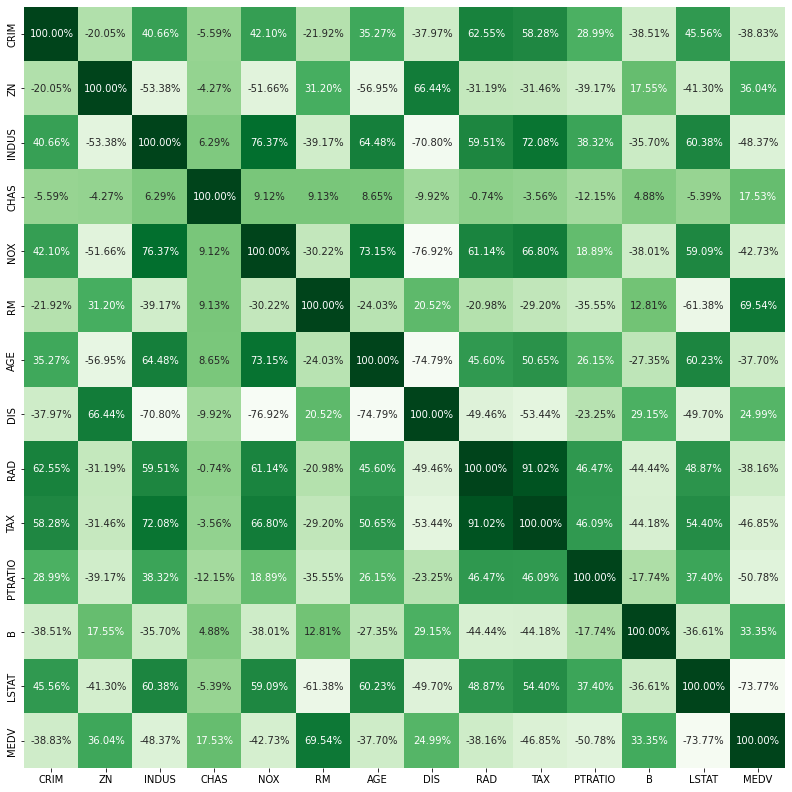

In [10]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar=False, square= True,fmt='.2%', annot=True, cmap='Greens')

In [11]:
# Checking for important features
X = df.iloc[:,0:13] #independent columns
y = df.iloc[:,-1] #target column i.e price range

In [12]:
# Extracting top features
y = np.round(df['MEDV'])
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores

,Specs,Score
0,CRIM,5503.817133
1,ZN,5937.859414
2,INDUS,873.746270
3,CHAS,59.080170
4,NOX,5.073299
5,RM,21.981504
6,AGE,2424.308937
7,DIS,163.919426
8,RAD,1445.257647
9,TAX,14817.836927


In [13]:
#print top 5 features
print(featureScores.nlargest(5,'Score')) 

   Specs         Score
9    TAX  14817.836927
1     ZN   5937.859414
0   CRIM   5503.817133
11     B   3340.486412
6    AGE   2424.308937


In [14]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [15]:
#use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_) 

[0.11622131 0.02415268 0.04189753 0.01510445 0.06826567 0.13904679
 0.12287189 0.10485121 0.03514333 0.04116264 0.04523924 0.1093927
 0.13665056]


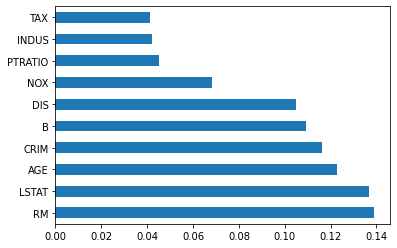

In [16]:
# Making a graph to better visualise
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Linear Regression

In [17]:
x = df.iloc[:,0:13]
y = df.iloc[:,-1]

In [18]:
#Splitting data into training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [19]:
#Fitting the model
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [20]:
y_pred = model.predict(x_train)

In [21]:
# Checking training accuracy
print("Training Accuracy:", model.score(x_train,y_train)*100)

Training Accuracy: 77.30135569264233


In [22]:
# Checking testing accuracy
print("Testing Accuracy:", model.score(x_test,y_test)*100)

Testing Accuracy: 58.922238491825254


In [23]:
# Checking model accuracy
print("Model Accuracy:",r2_score(y,model.predict(X))*100)

Model Accuracy: 73.73440319905038


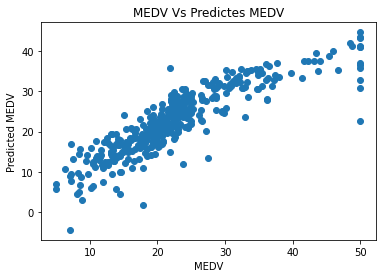

In [24]:
# Plotting to visualise
plt.scatter(y_train,y_pred)
plt.xlabel("MEDV")
plt.ylabel("Predicted MEDV")
plt.title("MEDV Vs Predictes MEDV")
plt.show()

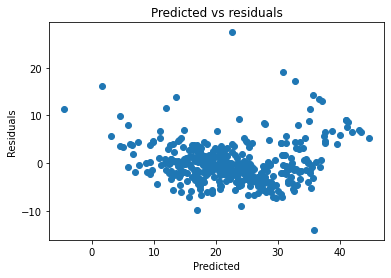

In [25]:
#Checking residuals
plt.scatter(y_pred, y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

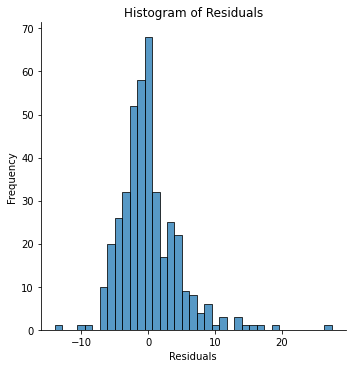

In [26]:
#Checking Normality of errors
sns.displot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

Random Forest Regression

In [27]:
x = df.iloc[:,[-1,5,10,4,9]]
y = df.iloc[:,[-1]]

In [28]:
#Splitting data into training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [29]:
reg = RandomForestRegressor()
reg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor()

In [30]:
y_pred = reg.predict(x_train)

In [31]:
print("Training Accuracy:",reg.score(x_train, y_train)*100)

Training Accuracy: 99.99419116128217


In [32]:
print("Testing Accuracy:",reg.score(x_test,y_test)*100)

Testing Accuracy: 99.99196796251967


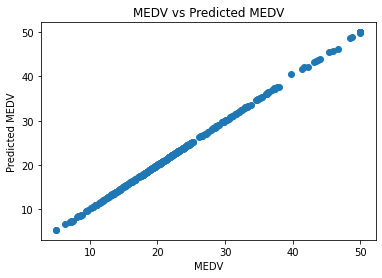

In [33]:
# Plotting the result
plt.scatter(y_train,y_pred)
plt.xlabel("MEDV")
plt.ylabel("Predicted MEDV")
plt.title("MEDV vs Predicted MEDV")
plt.show()